In [1]:
import pychemauth
import pickle

from run import load, build

2024-10-23 10:37:24.740781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import watermark
%load_ext watermark

%load_ext autoreload
%autoreload 2

%watermark -t -m -v --iversions

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

Compiler    : GCC 12.2.0
OS          : Linux
Release     : 6.8.0-47-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 40
Architecture: 64bit

watermark : 2.4.3
pychemauth: 0.0.0b4



# Make Dataset

In [3]:
X_train, X_test, y_train, y_test, idx_train, idx_test, centers, n_classes, image_size, enc, X_normed = load(limit=2631)

# Model 1

In [39]:
build(model_idx=1, image_size=image_size, n_classes=n_classes, activation='elu').summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2631, 1)]         0         
                                                                 
 conv1d_21 (Conv1D)          (None, 329, 16)           272       
                                                                 
 max_pooling1d_14 (MaxPooli  (None, 164, 16)           0         
 ng1D)                                                           
                                                                 
 conv1d_22 (Conv1D)          (None, 41, 128)           16512     
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 20, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_23 (Conv1D)          (None, 10, 512)           5248

In [35]:
finder = pychemauth.utils.NNTools.find_learning_rate(
    build(model_idx=1, image_size=image_size, n_classes=n_classes, activation='elu'),
    data=(X_train, y_train),
    start_lr=1.0e-10,
    end_lr=1.0e1,
    batch_size=50,
    n_updates=1000,
    seed=42
)

1/1 [==============================] - 0s 82ms/step
Epoch 1/206
5/5 [==============================] - 1s 17ms/step - loss: 2.5458 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 2/206
5/5 [==============================] - 0s 19ms/step - loss: 2.5458 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 3/206
5/5 [==============================] - 0s 19ms/step - loss: 2.5458 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 4/206
5/5 [==============================] - 0s 19ms/step - loss: 2.5458 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 5/206
5/5 [==============================] - 0s 19ms/step - loss: 2.5458 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 6/206
5/5 [==============================] - 0s 20ms/step - loss: 2.5458 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 7/206
5/5 [==============================] - 0s 19ms/step - loss: 2.5458 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1

5/5 [==============================] - 0s 19ms/step - loss: 2.1720 - accuracy: 0.2240 - sparse_categorical_accuracy: 0.2240
Epoch 120/206
5/5 [==============================] - 0s 19ms/step - loss: 2.1254 - accuracy: 0.2732 - sparse_categorical_accuracy: 0.2732
Epoch 121/206
5/5 [==============================] - 0s 19ms/step - loss: 2.2663 - accuracy: 0.2397 - sparse_categorical_accuracy: 0.2397
Epoch 122/206
5/5 [==============================] - 0s 19ms/step - loss: 2.1834 - accuracy: 0.2155 - sparse_categorical_accuracy: 0.2155
Epoch 123/206
5/5 [==============================] - 0s 19ms/step - loss: 2.0622 - accuracy: 0.2220 - sparse_categorical_accuracy: 0.2220
Epoch 124/206
5/5 [==============================] - 0s 19ms/step - loss: 1.9736 - accuracy: 0.3013 - sparse_categorical_accuracy: 0.3013
Epoch 125/206
5/5 [==============================] - 0s 19ms/step - loss: 2.0172 - accuracy: 0.2298 - sparse_categorical_accuracy: 0.2298
Epoch 126/206
5/5 [=============================

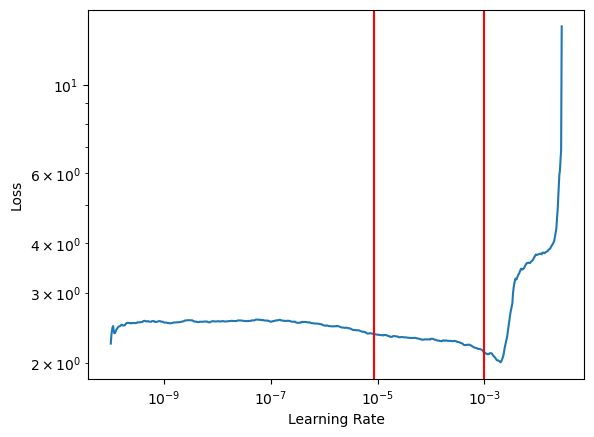

In [38]:
frac = 0.6

ax = finder.plot()
ax.set_yscale('log')
for l_ in finder.estimate_clr(frac=frac, skip=3):
    ax.axvline(l_, color='red')

In [ ]:
# A range of ~1e-5 to 1e-3

# Model 2

In [40]:
build(model_idx=2, image_size=image_size, n_classes=n_classes, activation='elu').summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 2631, 1)]         0         
                                                                 
 conv1d_24 (Conv1D)          (None, 329, 16)           272       
                                                                 
 conv1d_25 (Conv1D)          (None, 83, 16)            2064      
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 10, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_26 (Conv1D)          (None, 10, 32)            4128      
                                                                 
 conv1d_27 (Conv1D)          (None, 10, 32)            8224      
                                                           

In [55]:
finder = pychemauth.utils.NNTools.find_learning_rate(
    build(model_idx=2, image_size=image_size, n_classes=n_classes, activation='elu'),
    data=(X_train, y_train),
    start_lr=1.0e-10,
    end_lr=1.0e1,
    batch_size=50,
    n_updates=500,
    seed=42
)

1/1 [==============================] - 0s 114ms/step
Epoch 1/103
5/5 [==============================] - 1s 9ms/step - loss: 2.8160 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000    
Epoch 2/103
5/5 [==============================] - 0s 9ms/step - loss: 2.8160 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000    
Epoch 3/103
5/5 [==============================] - 0s 10ms/step - loss: 2.8160 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 4/103
5/5 [==============================] - 0s 11ms/step - loss: 2.8160 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 5/103
5/5 [==============================] - 0s 11ms/step - loss: 2.8160 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 6/103
5/5 [==============================] - 0s 11ms/step - loss: 2.8160 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 7/103
5/5 [==============================] - 0s 11ms/step - loss: 2.8160 - accuracy: 0.1000 - sparse_categorical_accura

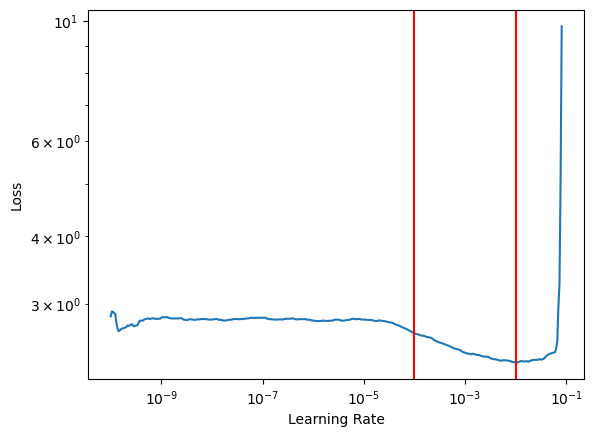

In [56]:
frac = 0.7

ax = finder.plot()
ax.set_yscale('log')
for l_ in finder.estimate_clr(frac=frac, skip=3):
    ax.axvline(l_, color='red')

In [45]:
# A range of ~1e-4 to 1e-2

# Model 3

In [57]:
build(model_idx=3, image_size=image_size, n_classes=n_classes, activation='elu').summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 2631, 1)]         0         
                                                                 
 conv1d_52 (Conv1D)          (None, 329, 16)           272       
                                                                 
 conv1d_53 (Conv1D)          (None, 83, 16)            2064      
                                                                 
 max_pooling1d_23 (MaxPooli  (None, 20, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_54 (Conv1D)          (None, 20, 32)            4128      
                                                                 
 conv1d_55 (Conv1D)          (None, 20, 32)            8224      
                                                          

In [62]:
finder = pychemauth.utils.NNTools.find_learning_rate(
    build(model_idx=3, image_size=image_size, n_classes=n_classes, activation='elu'),
    data=(X_train, y_train),
    start_lr=1.0e-10,
    end_lr=1.0e1,
    batch_size=50,
    n_updates=500,
    seed=42
)

1/1 [==============================] - 0s 116ms/step
Epoch 1/103
5/5 [==============================] - 1s 9ms/step - loss: 3.0957 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000    
Epoch 2/103
5/5 [==============================] - 0s 9ms/step - loss: 3.0957 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000    
Epoch 3/103
5/5 [==============================] - 0s 11ms/step - loss: 3.0957 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 4/103
5/5 [==============================] - 0s 11ms/step - loss: 3.0957 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 5/103
5/5 [==============================] - 0s 11ms/step - loss: 3.0957 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 6/103
5/5 [==============================] - 0s 12ms/step - loss: 3.0957 - accuracy: 0.1000 - sparse_categorical_accuracy: 0.1000
Epoch 7/103
5/5 [==============================] - 0s 11ms/step - loss: 3.0957 - accuracy: 0.1000 - sparse_categorical_accura

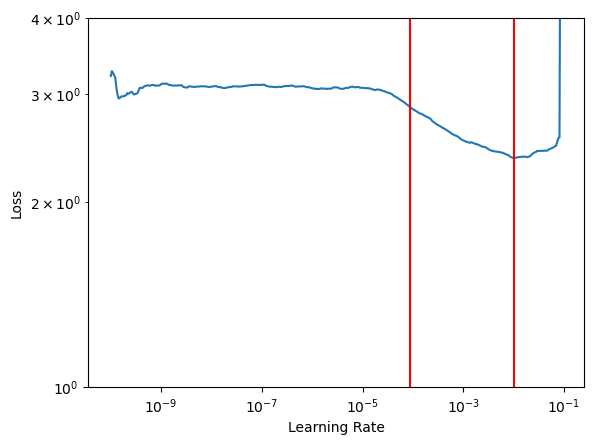

In [64]:
frac = 0.7

ax = finder.plot()
ax.set_yscale('log')
ax.set_ylim(1, 4)
for l_ in finder.estimate_clr(frac=frac, skip=10):
    ax.axvline(l_, color='red')

In [ ]:
# A range of ~5e-5 to 1e-2